In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


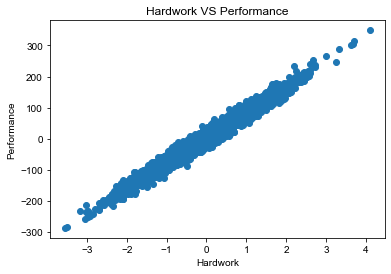

In [2]:
 X = pd.read_csv("Linear_X_Train.csv")
y = pd.read_csv("Linear_Y_Train.csv")

# visualise

plt.scatter(X , y)
plt.style.use('seaborn')
plt.title("Hardwork VS Performance")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show


#converting x and y into numpy
X =X.values
y = y.values

#normalization 
u = X.mean()
std= X.std()
X = (X-u)/std




In [11]:
def hypothesis(x , theta):
    y_ = theta[0] + theta[1]*x
    return y_


def gradient(X , Y , theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    for i in range (m):
        x = X[i]
        y_ = hypothesis(x , theta)
        y = Y[i]
        grad[0] = grad[0]+ [y_ - y]
        grad[1] = grad[1]+ [y_ - y]*x
        
        
    return grad/m    

#func to find error

def gradientdescent(X, Y ,max_steps = 100 , learning_rate = 0.1 ):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        
        grad = gradient(X, Y, theta)
        e= error(X,Y,theta)
        error_list.append(e)
        #compute grad
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        
    return theta , error_list


def error(X,Y,theta):
    m = X.shape[0]
   
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i] ,theta)
        total_error+= (y_ - Y[i])**2
        
        
        
    return total_error/m    

In [12]:
theta , error_list = gradientdescent(X,y)

In [13]:
theta

array([ 0.6838508 , 79.90361453])

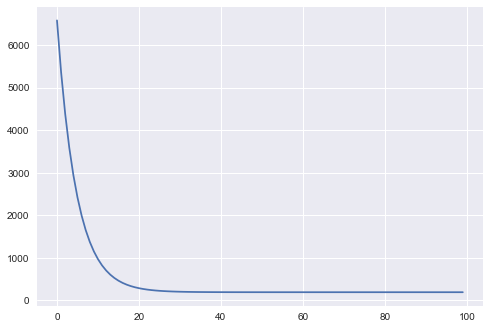

In [14]:
plt.plot(error_list)

In [15]:
y_ = hypothesis(X , theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


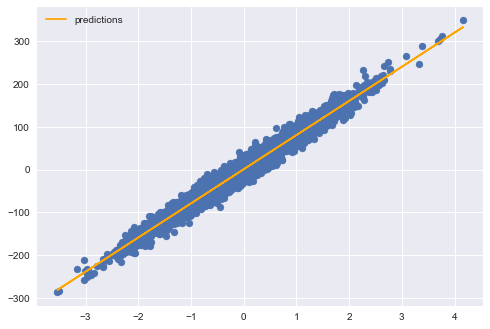

In [16]:
plt.scatter(X , y)
plt.plot(X, y_ , color = 'orange' , label ='predictions')
plt.legend()
plt.show()

In [24]:
x_test = pd.read_csv("Linear_X_Test.csv").values
y_test = hypothesis(x_test , theta)

In [25]:
df = pd.DataFrame(data=y_test,columns=['y_test'])
df.to_csv("y_predictions.csv",index= False)

In [28]:
def r2square(Y, Y_):
    num =np.sum((Y-Y_)**2)
    den = np.sum((Y-Y.mean())**2)
    score = (1-num/den)
    return score*100

In [29]:
r2square(y,y_)

97.09612226971643

In [32]:
T0 = np.arange(40,80,1)
T1 =np.arange(80 , 120,1)
T0 ,T1 = np.meshgrid(T0 , T1)
J = np.zeros(T0.shape)
for i in range (J.shape[0]):
    for j in range (J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j]= np.sum((y-y_)**2)


In [33]:
fig =plt.figure()
axes = fig.gca(projection = '3D')
axex.plot_surface(T0 , T1 , J , cmap = 'rainbow')

ValueError: Unknown projection '3D'

<Figure size 576x396 with 0 Axes>